In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

import norms
importlib.reload(norms)
from norms import norm_continuous, norm_L2

import os

%matplotlib inline

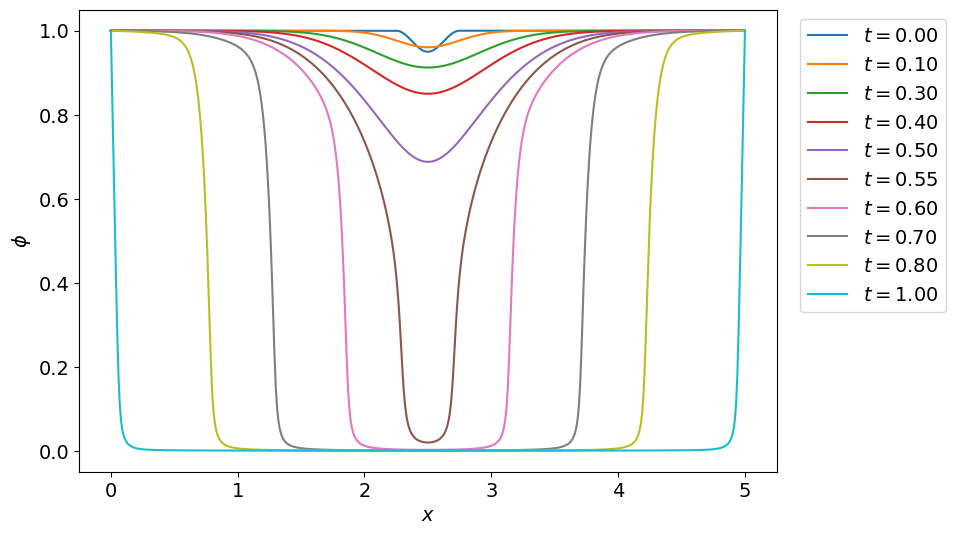

In [2]:
model = model_from_file('../../bin/typical_solution.csv')
model_plot(model, [0.0, 0.1, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 1.0], print_params=False, figsize=(9, 6))

In [5]:
power_n_x = []
for i in range(13):
    for j in range(26):
        filename = 'data_bounds/values_{}_{}.csv'.format(i, j)
        if os.path.isfile(filename):
            power_n_x.append(j)
            break
power_n_x

[3, 8, 8, 8, 8, 9, 10, 12, 14, 16, 18, 20, 22]

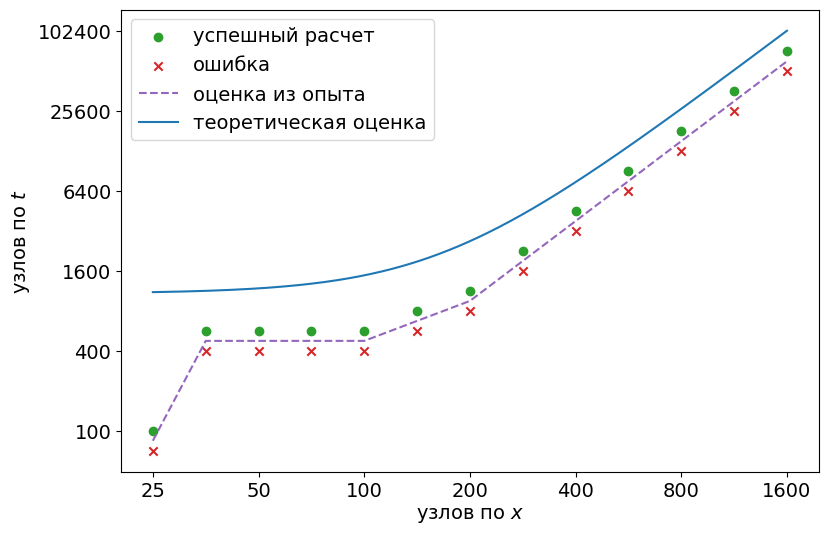

In [6]:
plt.figure(figsize=(9, 6))
plt.xlabel('узлов по $x$')
plt.xscale('log')
plt.xticks(ticks=25 * 2 ** np.arange(7), labels=25 * 2 ** np.arange(7))
plt.xticks(ticks=[], minor=True)
plt.ylabel('узлов по $t$')
plt.yscale('log')
plt.yticks(ticks=25 * 4 ** np.arange(7), labels=25 * 4 ** np.arange(7))
plt.yticks(ticks=[], minor=True)
base = np.sqrt(2)
plt.scatter(25 * base ** np.arange(13), 25 * base ** (np.array(power_n_x) + 1), marker='o', color='tab:green')
plt.scatter(25 * base ** np.arange(13), 25 * base ** np.array(power_n_x), marker='x', color='tab:red')
plt.plot(25 * base ** np.arange(13), 25 * base ** (np.array(power_n_x) + 0.5), '--', color='tab:purple')
x = 25 * base ** np.linspace(0, 12, 400)
plt.plot(x, (2.2 * 0.5 * 4.8**2 * 0.2) / 0.04**(5/3) + 2 * 0.5 / (5.0 / x)**2, color='tab:blue')
plt.legend(['успешный расчет', 'ошибка', 'оценка из опыта', 'теоретическая оценка'])
plt.show()